In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/saisheinhtet/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Linear alpha and beta for N=2

### Compute fairness, convergence and mean throughput

Mean throughput: 15.048598828125
Eigenvalues: [1.  0.5]
Perron eigenvector: [2.0, 2.0]
Second largest eigenvalue: 0.5
Congestion counter: 1660


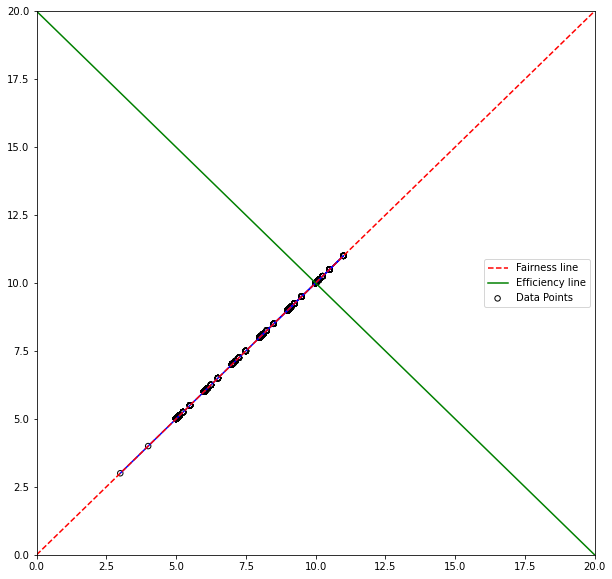

In [30]:
ITERATESMAX = 10000 
C = 20 # max congestion window
congestion_counter = 0
# ;
beta1 = 0.5 # <=== CHANGE 
beta2 = 0.5 # <=== CHANGE 
beta3 = 0 # <=== CHANGE

alpha1 = 1 # <=== CHANGE 
alpha2 = 1 # <=== CHANGE
alpha3 = 0 # <=== CHANGE

alpha_arr = [1,1] # <=== CHANGE
beta_arr = [0.5,0.5] # <=== CHANGE

x1 = 2 # initial value of x1
x2 = 2 # initial value of x2
x3 = 0

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
x3_values = np.zeros(ITERATESMAX)

throughput_values = np.zeros(ITERATESMAX)

for i in range(ITERATESMAX):
    if(x1 + x2 + x3 <= C):
        # Additive increase phase
        x1 = x1 + alpha1
        x2 = x2 + alpha2
        x3 = x3 + alpha3
    else:
        x1 = x1 * beta1
        x2 = x2 * beta2
        x3 = x3 * beta3
        congestion_counter += 1
        
    x1_values[i] = x1
    x2_values[i] = x2
    x3_values[i] = x3
    
    if(x1+x2+x3<= C):
        throughput_values[i] = x1 + x2 + x3
    else:
        throughput_values[i] = C # assume throughput when x1 + x2 > C = C since transmission rate cannot exceed threshold
      
# Set the figure size
plt.figure(figsize=(10, 10))

# Size of the dots
dot_size = 30

# Plotting scatter plot with hollow dots around each point
plt.scatter(x1_values, 
            x2_values, 
            s=dot_size, 
            edgecolors='black', 
            linewidths=1, 
            facecolors='none', 
            label='Data Points')

# Connect each dot with a line
plt.plot(x1_values, x2_values, 'b-')

# Plotting fairness line
x_line = np.linspace(0, max(x1_values + x2_values), 100)
y_line = x_line
plt.plot(x_line, y_line, 'r--', label='Fairness line')

# # Plotting y = 5/3x
# x_line_custom = np.linspace(0, C, 100)
# y_line_custom = 1.5* x_line_custom + 6.33
# plt.plot(x_line_custom, y_line_custom, 'b-', label='y = 5/3x')

# Plot efficiency line
x_line_downward = np.linspace(0, C, 100)
y_line_downward = C - x_line_downward
plt.plot(x_line_downward, y_line_downward, 'g-', label='Efficiency line')

# Set x-axis and y-axis limits
plt.xlim(0, C)
plt.ylim(0, C)

# Show the legend
plt.legend()

# Show the plot
# plt.show()

def create_transformation_matrix(alpha, beta):
    N = len(alpha)
    
    # Convert alpha and beta to numpy arrays to ensure consistent data type
    alpha = np.array(alpha)
    beta = np.array(beta)
    
    # Calculate the summation of alpha elements
    alpha_sum = np.sum(alpha)
    
    # Create the transformation matrix A
    A = np.zeros((N, N))
    
    # Diagonal elements
    A[np.diag_indices(N)] = beta
    
    # Matrix multiplication with alpha and beta
    A += np.outer(alpha, 1-beta) / alpha_sum
    
    return A

transformation_matrix = create_transformation_matrix(alpha_arr, beta_arr)

# print(f'alpha: {alpha_arr}')
# print(f'beta: {beta_arr}')

# Print the result
# print("\nTransformation Matrix A:")
# print(transformation_matrix)
print(f'Mean throughput: {np.mean(throughput_values)}')

# Calculate eigenvalues and eigenvectors
eigenValues = np.linalg.eigvals(transformation_matrix)
second_largest_eigenvalue = np.sort(eigenValues)[-2]
print(f'Eigenvalues: {eigenValues}')


perron_eig = []
for i in range(len(alpha_arr)):
    perron_eig.append(round(alpha_arr[i]/(1-beta_arr[i]),2))
print(f'Perron eigenvector: {perron_eig}')
print(f'Second largest eigenvalue: {second_largest_eigenvalue}')

throughput_df = pd.DataFrame({'vals': throughput_values})
# throughput_df.tail(20)

print(f'Congestion counter: {congestion_counter}')

# Changing initial window size

Mean throughput: 15.05099921875
Eigenvalues: [1.  0.5]
Perron eigenvector: [2.0, 2.0]
Second largest eigenvalue: 0.5
Congestion counter: 1661


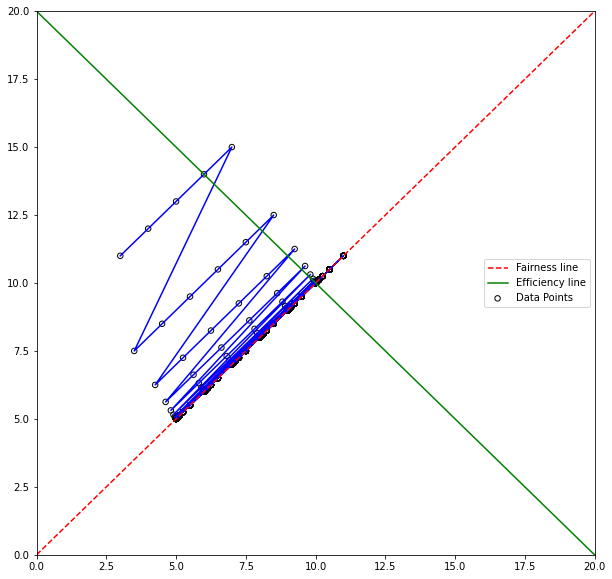

In [68]:
ITERATESMAX = 10000
C = 20 # max congestion window
congestion_counter = 0
# ;
beta1 = 0.5 # <=== CHANGE 
beta2 = 0.5 # <=== CHANGE 
beta3 = 0 # <=== CHANGE

alpha1 = 1 # <=== CHANGE 
alpha2 = 1 # <=== CHANGE
alpha3 = 0 # <=== CHANGE

alpha_arr = [1,1] # <=== CHANGE
beta_arr = [0.5,0.5] # <=== CHANGE

x1 = 2 # initial value of x1
x2 = 10 # initial value of x2
x3 = 0

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
x3_values = np.zeros(ITERATESMAX)

throughput_values = np.zeros(ITERATESMAX)

for i in range(ITERATESMAX):
    if(x1 + x2 + x3 <= C):
        # Additive increase phase
        x1 = x1 + alpha1
        x2 = x2 + alpha2
        x3 = x3 + alpha3
    else:
        x1 = x1 * beta1
        x2 = x2 * beta2
        x3 = x3 * beta3
        congestion_counter += 1
        
    x1_values[i] = x1
    x2_values[i] = x2
    x3_values[i] = x3
    
    if(x1+x2+x3<= C):
        throughput_values[i] = x1 + x2 + x3
    else:
        throughput_values[i] = C # assume throughput when x1 + x2 > C = C since transmission rate cannot exceed threshold
      
# Set the figure size
plt.figure(figsize=(10, 10))

# Size of the dots
dot_size = 30

# Plotting scatter plot with hollow dots around each point
plt.scatter(x1_values, 
            x2_values, 
            s=dot_size, 
            edgecolors='black', 
            linewidths=1, 
            facecolors='none', 
            label='Data Points')

# Connect each dot with a line
plt.plot(x1_values, x2_values, 'b-')

# Plotting fairness line
x_line = np.linspace(0, max(x1_values + x2_values), 100)
y_line = x_line
plt.plot(x_line, y_line, 'r--', label='Fairness line')

# # Plotting y = 5/3x
# x_line_custom = np.linspace(0, C, 100)
# y_line_custom = 1.5* x_line_custom + 6.33
# plt.plot(x_line_custom, y_line_custom, 'b-', label='y = 5/3x')

# Plot efficiency line
x_line_downward = np.linspace(0, C, 100)
y_line_downward = C - x_line_downward
plt.plot(x_line_downward, y_line_downward, 'g-', label='Efficiency line')

# Set x-axis and y-axis limits
plt.xlim(0, C)
plt.ylim(0, C)

# Show the legend
plt.legend()

# Show the plot
# plt.show()

transformation_matrix = create_transformation_matrix(alpha_arr, beta_arr)

# print(f'alpha: {alpha_arr}')
# print(f'beta: {beta_arr}')

# Print the result
# print("\nTransformation Matrix A:")
# print(transformation_matrix)

# Print the result
# print("\nTransformation Matrix A:")
# print(transformation_matrix)
print(f'Mean throughput: {np.mean(throughput_values)}')

# Calculate eigenvalues and eigenvectors
eigenValues = np.linalg.eigvals(transformation_matrix)
second_largest_eigenvalue = np.sort(eigenValues)[-2]
print(f'Eigenvalues: {eigenValues}')


perron_eig = []
for i in range(len(alpha_arr)):
    perron_eig.append(round(alpha_arr[i]/(1-beta_arr[i]),2))
print(f'Perron eigenvector: {perron_eig}')
print(f'Second largest eigenvalue: {second_largest_eigenvalue}')

throughput_df = pd.DataFrame({'vals': throughput_values})
# throughput_df.tail(20)

print(f'Congestion counter: {congestion_counter}')

# 50 iterations to demonstrate speed of convergence

Mean throughput: 15.27890625
Eigenvalues: [1.  0.5]
Perron eigenvector: [2.0, 2.0]
Second largest eigenvalue: 0.5
Congestion counter: 8


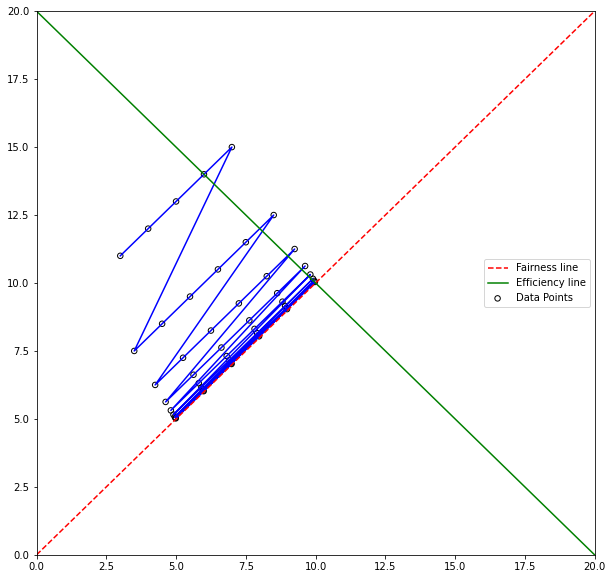

In [87]:
ITERATESMAX = 50
C = 20 # max congestion window
congestion_counter = 0
# ;
beta1 = 0.5 # <=== CHANGE 
beta2 = 0.5 # <=== CHANGE 
beta3 = 0 # <=== CHANGE

alpha1 = 1 # <=== CHANGE 
alpha2 = 1 # <=== CHANGE
alpha3 = 0 # <=== CHANGE

alpha_arr = [1,1] # <=== CHANGE
beta_arr = [0.5,0.5] # <=== CHANGE

x1 = 2 # initial value of x1
x2 = 10 # initial value of x2
x3 = 0

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
x3_values = np.zeros(ITERATESMAX)

throughput_values = np.zeros(ITERATESMAX)

for i in range(ITERATESMAX):
    if(x1 + x2 + x3 <= C):
        # Additive increase phase
        x1 = x1 + alpha1
        x2 = x2 + alpha2
        x3 = x3 + alpha3
    else:
        x1 = x1 * beta1
        x2 = x2 * beta2
        x3 = x3 * beta3
        congestion_counter += 1
        
    x1_values[i] = x1
    x2_values[i] = x2
    x3_values[i] = x3
    
    if(x1+x2+x3<= C):
        throughput_values[i] = x1 + x2 + x3
    else:
        throughput_values[i] = C # assume throughput when x1 + x2 > C = C since transmission rate cannot exceed threshold
      
# Set the figure size
plt.figure(figsize=(10, 10))

# Size of the dots
dot_size = 30

# Plotting scatter plot with hollow dots around each point
plt.scatter(x1_values, 
            x2_values, 
            s=dot_size, 
            edgecolors='black', 
            linewidths=1, 
            facecolors='none', 
            label='Data Points')

# Connect each dot with a line
plt.plot(x1_values, x2_values, 'b-')

# Plotting fairness line
x_line = np.linspace(0, max(x1_values + x2_values), 100)
y_line = x_line
plt.plot(x_line, y_line, 'r--', label='Fairness line')

# # Plotting y = 5/3x
# x_line_custom = np.linspace(0, C, 100)
# y_line_custom = 1.5* x_line_custom + 6.33
# plt.plot(x_line_custom, y_line_custom, 'b-', label='y = 5/3x')

# Plot efficiency line
x_line_downward = np.linspace(0, C, 100)
y_line_downward = C - x_line_downward
plt.plot(x_line_downward, y_line_downward, 'g-', label='Efficiency line')

# Set x-axis and y-axis limits
plt.xlim(0, C)
plt.ylim(0, C)

# Show the legend
plt.legend()

# Show the plot
# plt.show()

transformation_matrix = create_transformation_matrix(alpha_arr, beta_arr)

# print(f'alpha: {alpha_arr}')
# print(f'beta: {beta_arr}')

# Print the result
# print("\nTransformation Matrix A:")
# print(transformation_matrix)

# Print the result
# print("\nTransformation Matrix A:")
# print(transformation_matrix)
print(f'Mean throughput: {np.mean(throughput_values)}')

# Calculate eigenvalues and eigenvectors
eigenValues = np.linalg.eigvals(transformation_matrix)
second_largest_eigenvalue = np.sort(eigenValues)[-2]
print(f'Eigenvalues: {eigenValues}')


perron_eig = []
for i in range(len(alpha_arr)):
    perron_eig.append(round(alpha_arr[i]/(1-beta_arr[i]),2))
print(f'Perron eigenvector: {perron_eig}')
print(f'Second largest eigenvalue: {second_largest_eigenvalue}')

throughput_df = pd.DataFrame({'vals': throughput_values})
# throughput_df.tail(20)

print(f'Congestion counter: {congestion_counter}')

# Vary alpha

# Alpha > 1

Mean throughput: 16.9988
Eigenvalues: [0.5 1. ]
Perron eigenvector: [2.0, 6.0]
Second largest eigenvalue: 0.5
Congestion counter: 2499


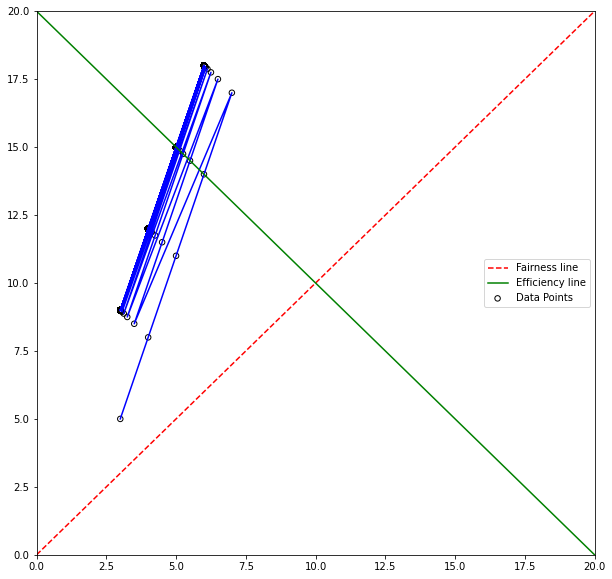

In [88]:
ITERATESMAX = 10000 
C = 20 # max congestion window
congestion_counter = 0
# ;
beta1 = 0.5 # <=== CHANGE 
beta2 = 0.5 # <=== CHANGE 
beta3 = 0 # <=== CHANGE

alpha1 = 1 # <=== CHANGE 
alpha2 = 3 # <=== CHANGE
alpha3 = 0 # <=== CHANGE

alpha_arr = [1,3] # <=== CHANGE
beta_arr = [0.5,0.5] # <=== CHANGE

x1 = 2 # initial value of x1
x2 = 2 # initial value of x2
x3 = 0

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
x3_values = np.zeros(ITERATESMAX)

throughput_values = np.zeros(ITERATESMAX)

for i in range(ITERATESMAX):
    if(x1 + x2 + x3 <= C):
        # Additive increase phase
        x1 = x1 + alpha1
        x2 = x2 + alpha2
        x3 = x3 + alpha3
    else:
        x1 = x1 * beta1
        x2 = x2 * beta2
        x3 = x3 * beta3
        congestion_counter += 1
        
    x1_values[i] = x1
    x2_values[i] = x2
    x3_values[i] = x3
    
    if(x1+x2+x3<= C):
        throughput_values[i] = x1 + x2 + x3
    else:
        throughput_values[i] = C # assume throughput when x1 + x2 > C = C since transmission rate cannot exceed threshold
      
# Set the figure size
plt.figure(figsize=(10, 10))

# Size of the dots
dot_size = 30

# Plotting scatter plot with hollow dots around each point
plt.scatter(x1_values, 
            x2_values, 
            s=dot_size, 
            edgecolors='black', 
            linewidths=1, 
            facecolors='none', 
            label='Data Points')

# Connect each dot with a line
plt.plot(x1_values, x2_values, 'b-')

# Plotting fairness line
x_line = np.linspace(0, max(x1_values + x2_values), 100)
y_line = x_line
plt.plot(x_line, y_line, 'r--', label='Fairness line')

# # Plotting y = 5/3x
# x_line_custom = np.linspace(0, C, 100)
# y_line_custom = 1.5* x_line_custom + 6.33
# plt.plot(x_line_custom, y_line_custom, 'b-', label='y = 5/3x')

# Plot efficiency line
x_line_downward = np.linspace(0, C, 100)
y_line_downward = C - x_line_downward
plt.plot(x_line_downward, y_line_downward, 'g-', label='Efficiency line')

# Set x-axis and y-axis limits
plt.xlim(0, C)
plt.ylim(0, C)

# Show the legend
plt.legend()

# Show the plot
# plt.show()

def create_transformation_matrix(alpha, beta):
    N = len(alpha)
    
    # Convert alpha and beta to numpy arrays to ensure consistent data type
    alpha = np.array(alpha)
    beta = np.array(beta)
    
    # Calculate the summation of alpha elements
    alpha_sum = np.sum(alpha)
    
    # Create the transformation matrix A
    A = np.zeros((N, N))
    
    # Diagonal elements
    A[np.diag_indices(N)] = beta
    
    # Matrix multiplication with alpha and beta
    A += np.outer(alpha, 1-beta) / alpha_sum
    
    return A

transformation_matrix = create_transformation_matrix(alpha_arr, beta_arr)

# print(f'alpha: {alpha_arr}')
# print(f'beta: {beta_arr}')

# Print the result
# print("\nTransformation Matrix A:")
# print(transformation_matrix)
print(f'Mean throughput: {np.mean(throughput_values)}')

# Calculate eigenvalues and eigenvectors
eigenValues = np.linalg.eigvals(transformation_matrix)
second_largest_eigenvalue = np.sort(eigenValues)[-2]
print(f'Eigenvalues: {eigenValues}')


perron_eig = []
for i in range(len(alpha_arr)):
    perron_eig.append(round(alpha_arr[i]/(1-beta_arr[i]),2))
print(f'Perron eigenvector: {perron_eig}')
print(f'Second largest eigenvalue: {second_largest_eigenvalue}')

throughput_df = pd.DataFrame({'vals': throughput_values})
# throughput_df.tail(20)

print(f'Congestion counter: {congestion_counter}')

# Alpha < 1

Mean throughput: 15.499688888888885
Eigenvalues: [1.  0.5]
Perron eigenvector: [2.0, 1.2]
Second largest eigenvalue: 0.5
Congestion counter: 1332


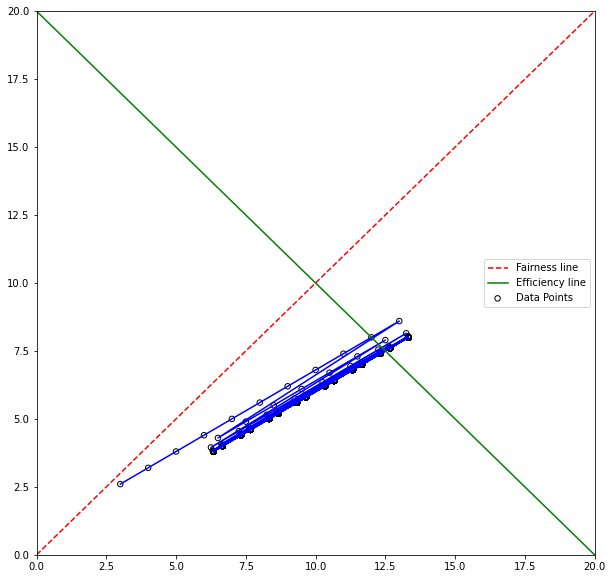

In [49]:
ITERATESMAX = 10000 
C = 20 # max congestion window
congestion_counter = 0
# ;
beta1 = 0.5 # <=== CHANGE 
beta2 = 0.5 # <=== CHANGE 
beta3 = 0 # <=== CHANGE

alpha1 = 1 # <=== CHANGE 
alpha2 = 0.6 # <=== CHANGE
alpha3 = 0 # <=== CHANGE

alpha_arr = [1,0.6] # <=== CHANGE
beta_arr = [0.5,0.5] # <=== CHANGE

x1 = 2 # initial value of x1
x2 = 2 # initial value of x2
x3 = 0

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
x3_values = np.zeros(ITERATESMAX)

throughput_values = np.zeros(ITERATESMAX)

for i in range(ITERATESMAX):
    if(x1 + x2 + x3 <= C):
        # Additive increase phase
        x1 = x1 + alpha1
        x2 = x2 + alpha2
        x3 = x3 + alpha3
    else:
        x1 = x1 * beta1
        x2 = x2 * beta2
        x3 = x3 * beta3
        congestion_counter += 1
        
    x1_values[i] = x1
    x2_values[i] = x2
    x3_values[i] = x3
    
    if(x1+x2+x3<= C):
        throughput_values[i] = x1 + x2 + x3
    else:
        throughput_values[i] = C # assume throughput when x1 + x2 > C = C since transmission rate cannot exceed threshold
      
# Set the figure size
plt.figure(figsize=(10, 10))

# Size of the dots
dot_size = 30

# Plotting scatter plot with hollow dots around each point
plt.scatter(x1_values, 
            x2_values, 
            s=dot_size, 
            edgecolors='black', 
            linewidths=1, 
            facecolors='none', 
            label='Data Points')

# Connect each dot with a line
plt.plot(x1_values, x2_values, 'b-')

# Plotting fairness line
x_line = np.linspace(0, max(x1_values + x2_values), 100)
y_line = x_line
plt.plot(x_line, y_line, 'r--', label='Fairness line')

# # Plotting y = 5/3x
# x_line_custom = np.linspace(0, C, 100)
# y_line_custom = 1.5* x_line_custom + 6.33
# plt.plot(x_line_custom, y_line_custom, 'b-', label='y = 5/3x')

# Plot efficiency line
x_line_downward = np.linspace(0, C, 100)
y_line_downward = C - x_line_downward
plt.plot(x_line_downward, y_line_downward, 'g-', label='Efficiency line')

# Set x-axis and y-axis limits
plt.xlim(0, C)
plt.ylim(0, C)

# Show the legend
plt.legend()

# Show the plot
# plt.show()

def create_transformation_matrix(alpha, beta):
    N = len(alpha)
    
    # Convert alpha and beta to numpy arrays to ensure consistent data type
    alpha = np.array(alpha)
    beta = np.array(beta)
    
    # Calculate the summation of alpha elements
    alpha_sum = np.sum(alpha)
    
    # Create the transformation matrix A
    A = np.zeros((N, N))
    
    # Diagonal elements
    A[np.diag_indices(N)] = beta
    
    # Matrix multiplication with alpha and beta
    A += np.outer(alpha, 1-beta) / alpha_sum
    
    return A

transformation_matrix = create_transformation_matrix(alpha_arr, beta_arr)

# print(f'alpha: {alpha_arr}')
# print(f'beta: {beta_arr}')

# Print the result
# print("\nTransformation Matrix A:")
# print(transformation_matrix)
print(f'Mean throughput: {np.mean(throughput_values)}')

# Calculate eigenvalues and eigenvectors
eigenValues = np.linalg.eigvals(transformation_matrix)
second_largest_eigenvalue = np.sort(eigenValues)[-2]
print(f'Eigenvalues: {eigenValues}')


perron_eig = []
for i in range(len(alpha_arr)):
    perron_eig.append(round(alpha_arr[i]/(1-beta_arr[i]),2))
print(f'Perron eigenvector: {perron_eig}')
print(f'Second largest eigenvalue: {second_largest_eigenvalue}')

throughput_df = pd.DataFrame({'vals': throughput_values})
# throughput_df.tail(20)

print(f'Congestion counter: {congestion_counter}')

# Vary beta

# Beta > 0.5

Mean throughput: 17.744469
Eigenvalues: [0.65 1.  ]
Perron eigenvector: [2.0, 5.0]
Second largest eigenvalue: 0.65
Congestion counter: 2498


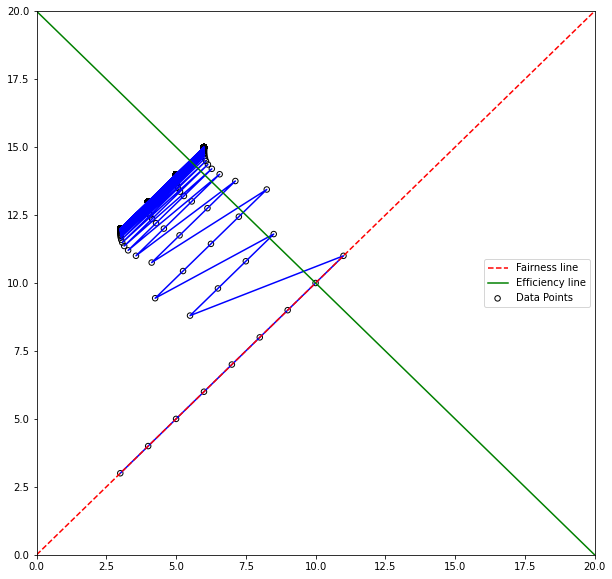

In [36]:
ITERATESMAX = 10000 
C = 20 # max congestion window
congestion_counter = 0
# ;
beta1 = 0.5 # <=== CHANGE 
beta2 = 0.8 # <=== CHANGE 
beta3 = 0 # <=== CHANGE

alpha1 = 1 # <=== CHANGE 
alpha2 = 1 # <=== CHANGE
alpha3 = 0 # <=== CHANGE

alpha_arr = [1,1] # <=== CHANGE
beta_arr = [0.5,0.8] # <=== CHANGE

x1 = 2 # initial value of x1
x2 = 2 # initial value of x2
x3 = 0

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
x3_values = np.zeros(ITERATESMAX)

throughput_values = np.zeros(ITERATESMAX)

for i in range(ITERATESMAX):
    if(x1 + x2 + x3 <= C):
        # Additive increase phase
        x1 = x1 + alpha1
        x2 = x2 + alpha2
        x3 = x3 + alpha3
    else:
        x1 = x1 * beta1
        x2 = x2 * beta2
        x3 = x3 * beta3
        congestion_counter += 1
        
    x1_values[i] = x1
    x2_values[i] = x2
    x3_values[i] = x3
    
    if(x1+x2+x3<= C):
        throughput_values[i] = x1 + x2 + x3
    else:
        throughput_values[i] = C # assume throughput when x1 + x2 > C = C since transmission rate cannot exceed threshold
      
# Set the figure size
plt.figure(figsize=(10, 10))

# Size of the dots
dot_size = 30

# Plotting scatter plot with hollow dots around each point
plt.scatter(x1_values, 
            x2_values, 
            s=dot_size, 
            edgecolors='black', 
            linewidths=1, 
            facecolors='none', 
            label='Data Points')

# Connect each dot with a line
plt.plot(x1_values, x2_values, 'b-')

# Plotting fairness line
x_line = np.linspace(0, max(x1_values + x2_values), 100)
y_line = x_line
plt.plot(x_line, y_line, 'r--', label='Fairness line')

# # Plotting y = 5/3x
# x_line_custom = np.linspace(0, C, 100)
# y_line_custom = 1.5* x_line_custom + 6.33
# plt.plot(x_line_custom, y_line_custom, 'b-', label='y = 5/3x')

# Plot efficiency line
x_line_downward = np.linspace(0, C, 100)
y_line_downward = C - x_line_downward
plt.plot(x_line_downward, y_line_downward, 'g-', label='Efficiency line')

# Set x-axis and y-axis limits
plt.xlim(0, C)
plt.ylim(0, C)

# Show the legend
plt.legend()

# Show the plot
# plt.show()

transformation_matrix = create_transformation_matrix(alpha_arr, beta_arr)

# print(f'alpha: {alpha_arr}')
# print(f'beta: {beta_arr}')

# Print the result
# print("\nTransformation Matrix A:")
# print(transformation_matrix)
print(f'Mean throughput: {np.mean(throughput_values)}')

# Calculate eigenvalues and eigenvectors
eigenValues = np.linalg.eigvals(transformation_matrix)
second_largest_eigenvalue = np.sort(eigenValues)[-2]
print(f'Eigenvalues: {eigenValues}')


perron_eig = []
for i in range(len(alpha_arr)):
    perron_eig.append(round(alpha_arr[i]/(1-beta_arr[i]),2))
print(f'Perron eigenvector: {perron_eig}')
print(f'Second largest eigenvalue: {second_largest_eigenvalue}')

throughput_df = pd.DataFrame({'vals': throughput_values})
# throughput_df.tail(20)

print(f'Congestion counter: {congestion_counter}')

# Beta < 0.5

Mean throughput: 14.48819591836735
Eigenvalues: [1.  0.4]
Perron eigenvector: [2.0, 1.43]
Second largest eigenvalue: 0.3999999999999999
Congestion counter: 1428


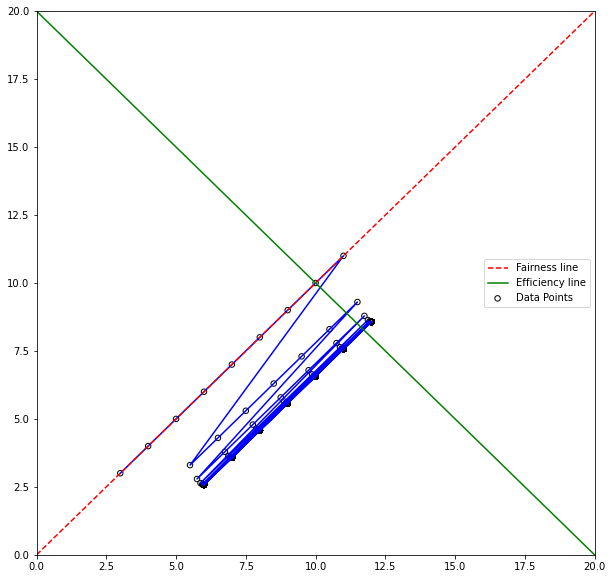

In [37]:
ITERATESMAX = 10000 
C = 20 # max congestion window
congestion_counter = 0
# ;
beta1 = 0.5 # <=== CHANGE 
beta2 = 0.3 # <=== CHANGE 
beta3 = 0 # <=== CHANGE

alpha1 = 1 # <=== CHANGE 
alpha2 = 1 # <=== CHANGE
alpha3 = 0 # <=== CHANGE

alpha_arr = [1,1] # <=== CHANGE
beta_arr = [0.5,0.3] # <=== CHANGE

x1 = 2 # initial value of x1
x2 = 2 # initial value of x2
x3 = 0

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
x3_values = np.zeros(ITERATESMAX)

throughput_values = np.zeros(ITERATESMAX)

for i in range(ITERATESMAX):
    if(x1 + x2 + x3 <= C):
        # Additive increase phase
        x1 = x1 + alpha1
        x2 = x2 + alpha2
        x3 = x3 + alpha3
    else:
        x1 = x1 * beta1
        x2 = x2 * beta2
        x3 = x3 * beta3
        congestion_counter += 1
        
    x1_values[i] = x1
    x2_values[i] = x2
    x3_values[i] = x3
    
    if(x1+x2+x3<= C):
        throughput_values[i] = x1 + x2 + x3
    else:
        throughput_values[i] = C # assume throughput when x1 + x2 > C = C since transmission rate cannot exceed threshold
      
# Set the figure size
plt.figure(figsize=(10, 10))

# Size of the dots
dot_size = 30

# Plotting scatter plot with hollow dots around each point
plt.scatter(x1_values, 
            x2_values, 
            s=dot_size, 
            edgecolors='black', 
            linewidths=1, 
            facecolors='none', 
            label='Data Points')

# Connect each dot with a line
plt.plot(x1_values, x2_values, 'b-')

# Plotting fairness line
x_line = np.linspace(0, max(x1_values + x2_values), 100)
y_line = x_line
plt.plot(x_line, y_line, 'r--', label='Fairness line')

# # Plotting y = 5/3x
# x_line_custom = np.linspace(0, C, 100)
# y_line_custom = 1.5* x_line_custom + 6.33
# plt.plot(x_line_custom, y_line_custom, 'b-', label='y = 5/3x')

# Plot efficiency line
x_line_downward = np.linspace(0, C, 100)
y_line_downward = C - x_line_downward
plt.plot(x_line_downward, y_line_downward, 'g-', label='Efficiency line')

# Set x-axis and y-axis limits
plt.xlim(0, C)
plt.ylim(0, C)

# Show the legend
plt.legend()

# Show the plot
# plt.show()

transformation_matrix = create_transformation_matrix(alpha_arr, beta_arr)

# print(f'alpha: {alpha_arr}')
# print(f'beta: {beta_arr}')

# Print the result
# print("\nTransformation Matrix A:")
# print(transformation_matrix)
print(f'Mean throughput: {np.mean(throughput_values)}')

# Calculate eigenvalues and eigenvectors
eigenValues = np.linalg.eigvals(transformation_matrix)
second_largest_eigenvalue = np.sort(eigenValues)[-2]
print(f'Eigenvalues: {eigenValues}')


perron_eig = []
for i in range(len(alpha_arr)):
    perron_eig.append(round(alpha_arr[i]/(1-beta_arr[i]),2))
print(f'Perron eigenvector: {perron_eig}')
print(f'Second largest eigenvalue: {second_largest_eigenvalue}')

throughput_df = pd.DataFrame({'vals': throughput_values})
# throughput_df.tail(20)

print(f'Congestion counter: {congestion_counter}')

# Linear AIMD for 3 users

In [52]:
ITERATESMAX = 10000 
C = 20 # max congestion window
congestion_counter = 0
# ;
beta1 = 0.5 # <=== CHANGE 
beta2 = 0.5 # <=== CHANGE 
beta3 = 0.5 # <=== CHANGE

alpha1 = 1 # <=== CHANGE 
alpha2 = 1 # <=== CHANGE
alpha3 = 1 # <=== CHANGE

alpha_arr = [1,1,1] # <=== CHANGE
beta_arr = [0.5,0.5,0.5] # <=== CHANGE

x1 = 2 # initial value of x1
x2 = 2 # initial value of x2
x3 = 2

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
x3_values = np.zeros(ITERATESMAX)

throughput_values = np.zeros(ITERATESMAX)

for i in range(ITERATESMAX):
    if(x1 + x2 + x3 <= C):
        # Additive increase phase
        x1 = x1 + alpha1
        x2 = x2 + alpha2
        x3 = x3 + alpha3
    else:
        x1 = x1 * beta1
        x2 = x2 * beta2
        x3 = x3 * beta3
        congestion_counter += 1
        
    x1_values[i] = x1
    x2_values[i] = x2
    x3_values[i] = x3
    
    if(x1+x2+x3<= C):
        throughput_values[i] = x1 + x2 + x3
    else:
        throughput_values[i] = C # assume throughput when x1 + x2 > C = C since transmission rate cannot exceed threshold

transformation_matrix = create_transformation_matrix(alpha_arr, beta_arr)

# print(f'alpha: {alpha_arr}')
# print(f'beta: {beta_arr}')

# Print the result
# print("\nTransformation Matrix A:")
# print(transformation_matrix)
print(f'Mean throughput: {np.mean(throughput_values)}')

# Calculate eigenvalues and eigenvectors
eigenValues = np.linalg.eigvals(transformation_matrix)
second_largest_eigenvalue = np.sort(eigenValues)[-2]
print(f'Eigenvalues: {eigenValues}')


perron_eig = []
for i in range(len(alpha_arr)):
    perron_eig.append(round(alpha_arr[i]/(1-beta_arr[i]),2))
print(f'Perron eigenvector: {perron_eig}')
print(f'Second largest eigenvalue: {second_largest_eigenvalue}')

throughput_df = pd.DataFrame({'vals': throughput_values})
# throughput_df.tail(20)

print(f'Congestion counter: {congestion_counter}')

Mean throughput: 15.58759999998311
Eigenvalues: [0.5 1.  0.5]
Perron eigenvector: [2.0, 2.0, 2.0]
Second largest eigenvalue: 0.5
Congestion counter: 2217


# Increase alpha number of users = 3

In [55]:
ITERATESMAX = 10000 
C = 20 # max congestion window
congestion_counter = 0
# ;
beta1 = 0.5 # <=== CHANGE 
beta2 = 0.5 # <=== CHANGE 
beta3 = 0.5 # <=== CHANGE

alpha1 = 1 # <=== CHANGE 
alpha2 = 3 # <=== CHANGE
alpha3 = 1 # <=== CHANGE

alpha_arr = [1,3,1] # <=== CHANGE
beta_arr = [0.5,0.5,0.5] # <=== CHANGE

x1 = 2 # initial value of x1
x2 = 2 # initial value of x2
x3 = 2
a
x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
x3_values = np.zeros(ITERATESMAX)

throughput_values = np.zeros(ITERATESMAX)

for i in range(ITERATESMAX):
    if(x1 + x2 + x3 <= C):
        # Additive increase phase
        x1 = x1 + alpha1
        x2 = x2 + alpha2
        x3 = x3 + alpha3
    else:
        x1 = x1 * beta1
        x2 = x2 * beta2
        x3 = x3 * beta3
        congestion_counter += 1
        
    x1_values[i] = x1
    x2_values[i] = x2
    x3_values[i] = x3
    
    if(x1+x2+x3<= C):
        throughput_values[i] = x1 + x2 + x3
    else:
        throughput_values[i] = C # assume throughput when x1 + x2 > C = C since transmission rate cannot exceed threshold

transformation_matrix = create_transformation_matrix(alpha_arr, beta_arr)

print(f'Mean throughput: {np.mean(throughput_values)}')

# Calculate eigenvalues and eigenvectors
eigenValues = np.linalg.eigvals(transformation_matrix)
second_largest_eigenvalue = np.sort(eigenValues)[-2]
print(f'Eigenvalues: {eigenValues}')


perron_eig = []
for i in range(len(alpha_arr)):
    perron_eig.append(round(alpha_arr[i]/(1-beta_arr[i]),2))
print(f'Perron eigenvector: {perron_eig}')
print(f'Second largest eigenvalue: {second_largest_eigenvalue}')

throughput_df = pd.DataFrame({'vals': throughput_values})
# throughput_df.tail(20)

print(f'Congestion counter: {congestion_counter}')

Mean throughput: 15.0964
Eigenvalues: [0.5 1.  0.5]
Perron eigenvector: [2.0, 6.0, 2.0]
Second largest eigenvalue: 0.49999999999999994
Congestion counter: 3311


# Increase beta number of users = 3

In [54]:
ITERATESMAX = 10000 
C = 20 # max congestion window
congestion_counter = 0
# ;
beta1 = 0.5 # <=== CHANGE 
beta2 = 0.8 # <=== CHANGE 
beta3 = 0.5 # <=== CHANGE

alpha1 = 1 # <=== CHANGE 
alpha2 = 1 # <=== CHANGE
alpha3 = 1 # <=== CHANGE

alpha_arr = [1,1,1] # <=== CHANGE
beta_arr = [0.5,0.8,0.5] # <=== CHANGE

x1 = 2 # initial value of x1
x2 = 2 # initial value of x2
x3 = 2

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
x3_values = np.zeros(ITERATESMAX)

throughput_values = np.zeros(ITERATESMAX)

for i in range(ITERATESMAX):
    if(x1 + x2 + x3 <= C):
        # Additive increase phase
        x1 = x1 + alpha1
        x2 = x2 + alpha2
        x3 = x3 + alpha3
    else:
        x1 = x1 * beta1
        x2 = x2 * beta2
        x3 = x3 * beta3
        congestion_counter += 1
        
    x1_values[i] = x1
    x2_values[i] = x2
    x3_values[i] = x3
    
    if(x1+x2+x3<= C):
        throughput_values[i] = x1 + x2 + x3
    else:
        throughput_values[i] = C # assume throughput when x1 + x2 > C = C since transmission rate cannot exceed threshold

transformation_matrix = create_transformation_matrix(alpha_arr, beta_arr)

print(f'Mean throughput: {np.mean(throughput_values)}')

# Calculate eigenvalues and eigenvectors
eigenValues = np.linalg.eigvals(transformation_matrix)
second_largest_eigenvalue = np.sort(eigenValues)[-2]
print(f'Eigenvalues: {eigenValues}')


perron_eig = []
for i in range(len(alpha_arr)):
    perron_eig.append(round(alpha_arr[i]/(1-beta_arr[i]),2))
print(f'Perron eigenvector: {perron_eig}')
print(f'Second largest eigenvalue: {second_largest_eigenvalue}')

throughput_df = pd.DataFrame({'vals': throughput_values})
# throughput_df.tail(20)

print(f'Congestion counter: {congestion_counter}')

Mean throughput: 17.485586883573532
Eigenvalues: [1.  0.5 0.7]
Perron eigenvector: [2.0, 5.0, 2.0]
Second largest eigenvalue: 0.7
Congestion counter: 2953


# Standard TCP


Mean throughput: 15.623829451256169
Congestion counter: 260


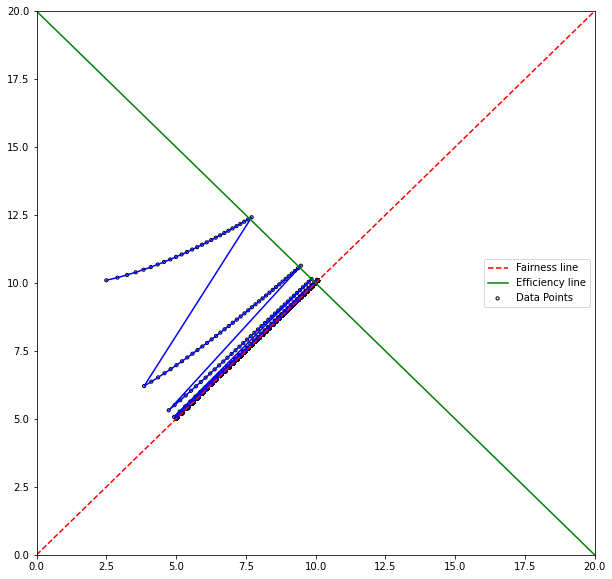

In [71]:
ITERATESMAX = 10000
C = 20 # max congestion window
congestion_counter = 0

beta1 = 0.5 # <=== CHANGE 
beta2 = 0.5 # <=== CHANGE 
beta3 = 0 # <=== CHANGE

x1 = 2 # initial value of x1
x2 = 10 # initial value of x2
x3 = 0

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
x3_values = np.zeros(ITERATESMAX)

throughput_values = np.zeros(ITERATESMAX)

for i in range(ITERATESMAX):
    if(x1 + x2 + x3 <= C):
        # Additive increase phase
        x1 = x1 + 1/x1
        x2 = x2 + 1/x2
#         x3 = x3 + 1/x3
    else:
        x1 = x1 * beta1
        x2 = x2 * beta2
        x3 = x3 * beta3
        congestion_counter += 1
        
    x1_values[i] = x1
    x2_values[i] = x2
    x3_values[i] = x3
    
    if(x1+x2+x3<= C):
        throughput_values[i] = x1 + x2 + x3
    else:
        throughput_values[i] = C # assume throughput when x1 + x2 > C = C since transmission rate cannot exceed threshold
      
# Set the figure size
plt.figure(figsize=(10, 10))

# Size of the dots
dot_size = 10

# Plotting scatter plot with hollow dots around each point
plt.scatter(x1_values, 
            x2_values, 
            s=dot_size, 
            edgecolors='black', 
            linewidths=1, 
            facecolors='none', 
            label='Data Points')

# Connect each dot with a line
plt.plot(x1_values, x2_values, 'b-')

# Plotting fairness line
x_line = np.linspace(0, max(x1_values + x2_values), 100)
y_line = x_line
plt.plot(x_line, y_line, 'r--', label='Fairness line')

# # Plotting y = 5/3x
# x_line_custom = np.linspace(0, C, 100)
# y_line_custom = 1.5* x_line_custom + 6.33
# plt.plot(x_line_custom, y_line_custom, 'b-', label='y = 5/3x')

# Plot efficiency line
x_line_downward = np.linspace(0, C, 100)
y_line_downward = C - x_line_downward
plt.plot(x_line_downward, y_line_downward, 'g-', label='Efficiency line')

# Set x-axis and y-axis limits
plt.xlim(0, C)
plt.ylim(0, C)

# Show the legend
plt.legend()

# Show the plot
# plt.show()

print(f'\nMean throughput: {np.mean(throughput_values)}')
print(f'Congestion counter: {congestion_counter}')

# throughput_df = pd.DataFrame({'vals': throughput_values})
# throughput_df.tail(55)

# Standard TCP iteration 50


Mean throughput: 15.41790189700833
Congestion counter: 1


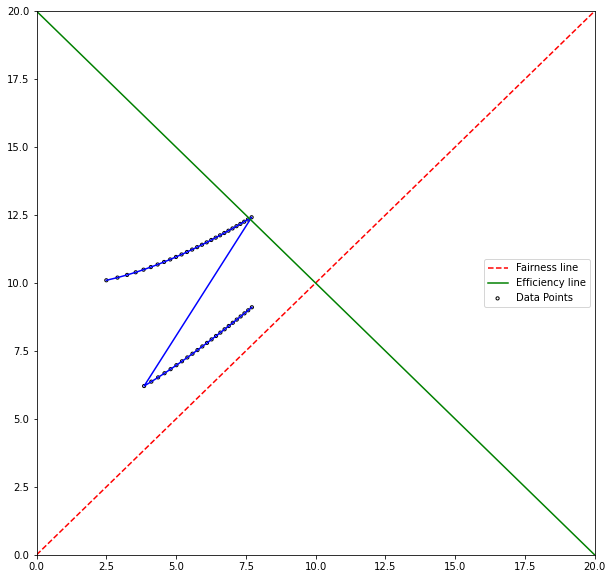

In [65]:
ITERATESMAX = 50
C = 20 # max congestion window
congestion_counter = 0

beta1 = 0.5 # <=== CHANGE 
beta2 = 0.5 # <=== CHANGE 
beta3 = 0 # <=== CHANGE

x1 = 2 # initial value of x1
x2 = 10 # initial value of x2
# x3 = 0

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
x3_values = np.zeros(ITERATESMAX)

throughput_values = np.zeros(ITERATESMAX)

for i in range(ITERATESMAX):
    if(x1 + x2 + x3 <= C):
        # Additive increase phase
        x1 = x1 + 1/x1
        x2 = x2 + 1/x2
#         x3 = x3 + 1/x3
    else:
        x1 = x1 * beta1
        x2 = x2 * beta2
        x3 = x3 * beta3
        congestion_counter += 1
        
    x1_values[i] = x1
    x2_values[i] = x2
    x3_values[i] = x3
    
    if(x1+x2+x3<= C):
        throughput_values[i] = x1 + x2 + x3
    else:
        throughput_values[i] = C # assume throughput when x1 + x2 > C = C since transmission rate cannot exceed threshold
      
# Set the figure size
plt.figure(figsize=(10, 10))

# Size of the dots
dot_size = 10

# Plotting scatter plot with hollow dots around each point
plt.scatter(x1_values, 
            x2_values, 
            s=dot_size, 
            edgecolors='black', 
            linewidths=1, 
            facecolors='none', 
            label='Data Points')

# Connect each dot with a line
plt.plot(x1_values, x2_values, 'b-')

# Plotting fairness line
x_line = np.linspace(0, max(x1_values + x2_values), 100)
y_line = x_line
plt.plot(x_line, y_line, 'r--', label='Fairness line')

# # Plotting y = 5/3x
# x_line_custom = np.linspace(0, C, 100)
# y_line_custom = 1.5* x_line_custom + 6.33
# plt.plot(x_line_custom, y_line_custom, 'b-', label='y = 5/3x')

# Plot efficiency line
x_line_downward = np.linspace(0, C, 100)
y_line_downward = C - x_line_downward
plt.plot(x_line_downward, y_line_downward, 'g-', label='Efficiency line')

# Set x-axis and y-axis limits
plt.xlim(0, C)
plt.ylim(0, C)

# Show the legend
plt.legend()

# Show the plot
# plt.show()

print(f'\nMean throughput: {np.mean(throughput_values)}')
print(f'Congestion counter: {congestion_counter}')

# throughput_df = pd.DataFrame({'vals': throughput_values})
# throughput_df.tail(55)

# SQRT AIMD

In [72]:
import math


Mean throughput: 15.827656603559808
Congestion counter: 3200


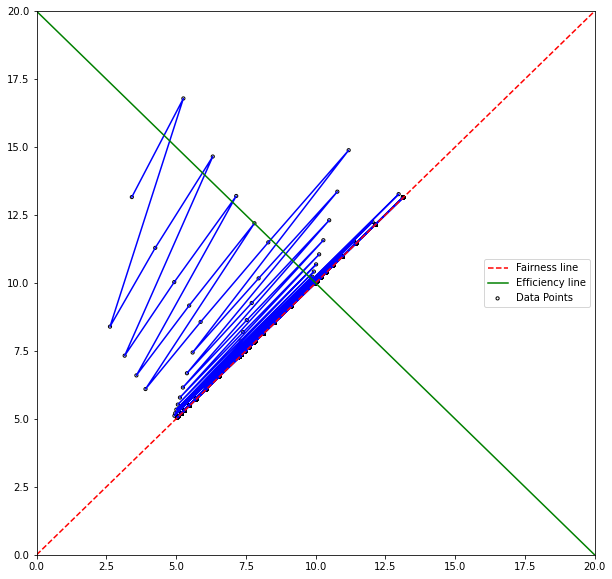

In [84]:
ITERATESMAX = 10000
C = 20 # max congestion window
congestion_counter = 0

beta1 = 0.5 # <=== CHANGE 
beta2 = 0.5 # <=== CHANGE 
beta3 = 0 # <=== CHANGE

x1 = 2 # initial value of x1
x2 = 10 # initial value of x2
x3 = 0

x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
x3_values = np.zeros(ITERATESMAX)

throughput_values = np.zeros(ITERATESMAX)

for i in range(ITERATESMAX):
    if(x1 + x2 + x3 <= C):
        # Additive increase phase
        x1 = x1 + math.sqrt(x1)
        x2 = x2 + math.sqrt(x2)
#         x3 = x3 + 1/x3
    else:
        x1 = x1 * beta1
        x2 = x2 * beta2
        x3 = x3 * beta3
        congestion_counter += 1
        
    x1_values[i] = x1
    x2_values[i] = x2
    x3_values[i] = x3
    
    if(x1+x2+x3<= C):
        throughput_values[i] = x1 + x2 + x3
    else:
        throughput_values[i] = C # assume throughput when x1 + x2 > C = C since transmission rate cannot exceed threshold
      
# Set the figure size
plt.figure(figsize=(10, 10))

# Size of the dots
dot_size = 10

# Plotting scatter plot with hollow dots around each point
plt.scatter(x1_values, 
            x2_values, 
            s=dot_size, 
            edgecolors='black', 
            linewidths=1, 
            facecolors='none', 
            label='Data Points')

# Connect each dot with a line
plt.plot(x1_values, x2_values, 'b-')

# Plotting fairness line
x_line = np.linspace(0, max(x1_values + x2_values), 100)
y_line = x_line
plt.plot(x_line, y_line, 'r--', label='Fairness line')

# # Plotting y = 5/3x
# x_line_custom = np.linspace(0, C, 100)
# y_line_custom = 1.5* x_line_custom + 6.33
# plt.plot(x_line_custom, y_line_custom, 'b-', label='y = 5/3x')

# Plot efficiency line
x_line_downward = np.linspace(0, C, 100)
y_line_downward = C - x_line_downward
plt.plot(x_line_downward, y_line_downward, 'g-', label='Efficiency line')

# Set x-axis and y-axis limits
plt.xlim(0, C)
plt.ylim(0, C)

# Show the legend
plt.legend()

# Show the plot
# plt.show()

print(f'\nMean throughput: {np.mean(throughput_values)}')
print(f'Congestion counter: {congestion_counter}')

# throughput_df = pd.DataFrame({'vals': throughput_values})
# throughput_df.tail(55)